In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [10]:
X_train,x_tes,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

In [11]:
X_train.shape,x_tes.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [14]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()
mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [20]:
X_train['mean_age']=X_train['Age'].fillna(mean_age)
X_train['median_age']=X_train['Age'].fillna(median_age)
X_train['median_fare']=X_train['Fare'].fillna(median_fare)
X_train['mean_fare']=X_train['Fare'].fillna(mean_fare)

In [21]:
X_train.sample(5)

,Age,Fare,Family,mean_age,median_age,median_fare,mean_fare
223,NaN,7.8958,0,29.498846,28.0,7.8958,7.8958
640,20.0,7.8542,0,20.000000,20.0,7.8542,7.8542
268,58.0,153.4625,1,58.000000,58.0,153.4625,153.4625
166,NaN,55.0000,1,29.498846,28.0,55.0000,55.0000
325,36.0,135.6333,0,36.000000,36.0,135.6333,135.6333


In [22]:
print('Original Age Variable variance:', X_train['Age'].var())
print('Original Fare Variable variance:', X_train['Fare'].var())
print('Mean Age Variable variance:', X_train['mean_age'].var())
print('Median Age Variable variance:', X_train['median_age'].var())
print('Mean Fare Variable variance:', X_train['mean_fare'].var())
print('Median Fare Variable variance:', X_train['median_fare'].var())

Original Age Variable variance: 210.2517072477435
Original Fare Variable variance: 2761.0314349486343
Mean Age Variable variance: 168.85193366872227
Median Age Variable variance: 169.20731007048155
Mean Fare Variable variance: 2621.232374951235
Median Fare Variable variance: 2637.012481677765


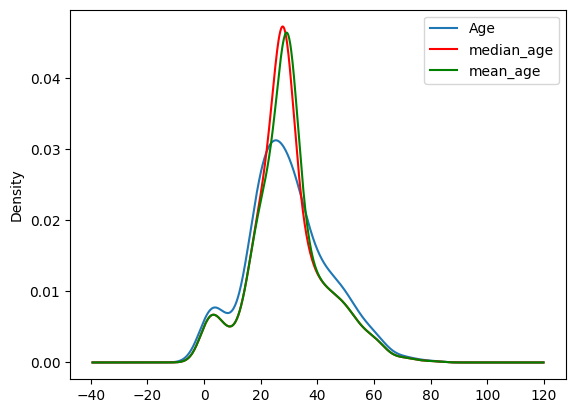

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['median_age'].plot(kind='kde',ax=ax,color='red')
X_train['mean_age'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

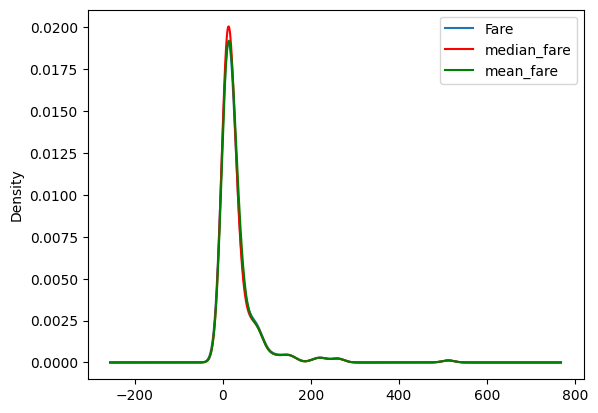

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Fare'].plot(kind='kde',ax=ax)
X_train['median_fare'].plot(kind='kde',ax=ax,color='red')
X_train['mean_fare'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Using Sklearn

In [28]:
X_train, X_tes, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

In [29]:
imputer1= SimpleImputer(strategy='median')
imputer2= SimpleImputer(strategy='mean')

In [31]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [32]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [34]:
ColumnTransformer(remainder='passthrough',transformers=[('imputer1',SimpleImputer(strategy='median'),['Age']), ('imputer2',SimpleImputer(),['Fare'])])

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [35]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [36]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [37]:
X_train=trf.transform(X_train)

X_tes=trf.transform(X_tes)

In [38]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]], shape=(712, 3))